<a href="https://colab.research.google.com/github/Nurhidaya244012/PMA_MRTB1123/blob/main/A3_PMA_MRTB_1123_Nurhidaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = "/content/SapphireCoffee#2.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand the structure
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Weekly Sales,Store Size (Sq. Ft.),College Nearby,Drive Thru
2,4315.999161,855,NO,NO
3,3250.048527,673,NO,YES
4,4322.797655,938,NO,NO


In [ ]:
# Skip the first two rows to correctly set the headers and extract the actual data
df = pd.read_excel(file_path, skiprows=2)

# Clean column names for ease of use
df.columns = ['Weekly_Sales', 'Store_Size', 'College_Nearby', 'Drive_Thru']

# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weekly_Sales    53 non-null     float64
 1   Store_Size      53 non-null     int64  
 2   College_Nearby  53 non-null     object 
 3   Drive_Thru      53 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [ ]:
import statsmodels.api as sm

# Convert categorical variables to binary
df['College_Nearby'] = df['College_Nearby'].map({'YES': 1, 'NO': 0})
df['Drive_Thru'] = df['Drive_Thru'].map({'YES': 1, 'NO': 0})

# Prepare regression model with interaction terms
X = df[['Store_Size', 'College_Nearby', 'Drive_Thru']]
X = sm.add_constant(X)  # Adds intercept term
y = df['Weekly_Sales']

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     101.8
Date:                Sat, 12 Jul 2025   Prob (F-statistic):           4.67e-21
Time:                        08:22:26   Log-Likelihood:                -348.14
No. Observations:                  53   AIC:                             704.3
Df Residuals:                      49   BIC:                             712.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3224.1257    269.817     11.949      0.000    2681.908    3766.344
Store_Size         1.3428      0.291      4.615      0.000       0.758       1.928
College_Nearby   450.1013     69.965      6.433      0.000     309.502     590.701
Drive_Thru      -580.5436     90.157     -6.439      0.000    -761.720    -399.367
==============================================================================
Omnibus:                        8.518   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.820
Skew:                          -0.151   Prob(JB):                        0.244
Kurtosis:                       1.911   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unique groups: ['College=No, DriveThru=No' 'College=No, DriveThru=Yes'
 'College=Yes, DriveThru=No']


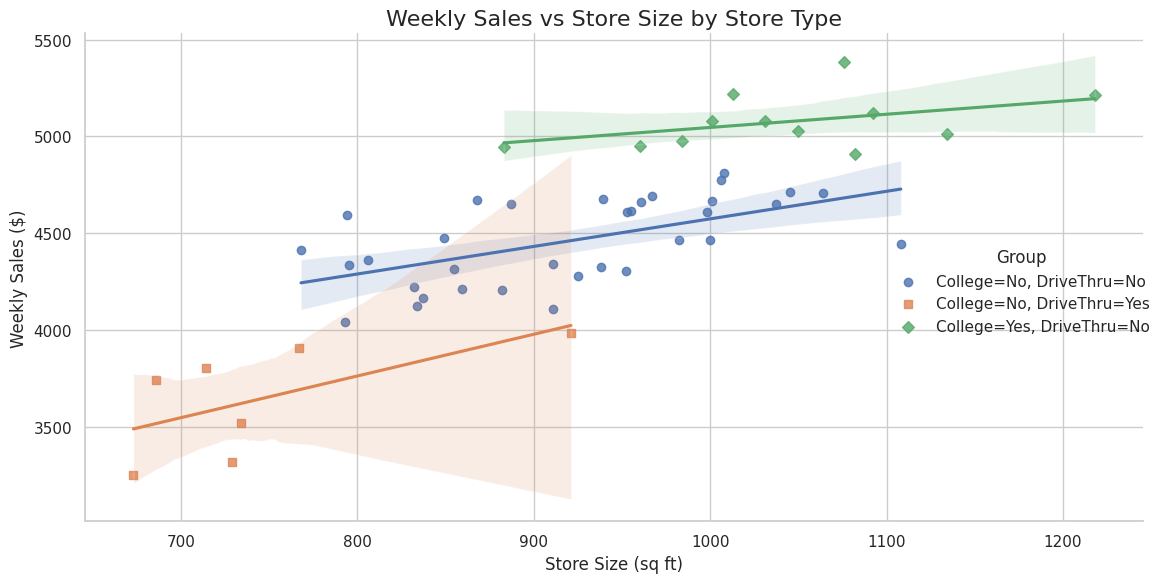

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create group labels again just to be safe
df['Group'] = df.apply(
    lambda row: f"College={'Yes' if row['College_Nearby'] else 'No'}, DriveThru={'Yes' if row['Drive_Thru'] else 'No'}",
    axis=1
)

# Check how many groups there are
unique_groups = df['Group'].unique()
print("Unique groups:", unique_groups)

# Create a list of markers that matches the number of unique groups
markers = ['o', 's', 'D', '^'][:len(unique_groups)]  # Slice to ensure correct length

# Plot
sns.set(style="whitegrid")
g = sns.lmplot(
    data=df,
    x='Store_Size',
    y='Weekly_Sales',
    hue='Group',
    height=6,
    aspect=1.5,
    markers=markers
)

plt.title("Weekly Sales vs Store Size by Store Type", fontsize=16)
plt.xlabel("Store Size (sq ft)", fontsize=12)
plt.ylabel("Weekly Sales ($)", fontsize=12)
plt.tight_layout()
plt.show()